In [1]:
from cassandra.cluster import Cluster
from cassandra.query import SimpleStatement
from cassandra.auth import PlainTextAuthProvider

/home/lmoroco/Documentos/5to/TDS/projects/pruebas/ScalableRecommendSystem/venv/lib/python3.6/site-packages/cassandra/policies.py:25: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  from cryptography.hazmat.primitives import padding


In [2]:
cluster = Cluster(
    port=9042, 
    auth_provider=PlainTextAuthProvider(username='cassandra', password='root'))

In [3]:
session = cluster.connect()

In [4]:
session.set_keyspace("devtest")

In [5]:
rows = session.execute("SELECT * FROM genres")
for row in rows:
    print(row)

Row(id=5, name='IMAX')
Row(id=10, name='Romance')
Row(id=16, name='Film-Noir')
Row(id=13, name='Musical')
Row(id=11, name='Crime')
Row(id=1, name='Documentary')
Row(id=19, name='Thriller')
Row(id=8, name='War')
Row(id=2, name='Adventure')
Row(id=4, name='Children')
Row(id=18, name='(no genres listed)')
Row(id=15, name='Horror')
Row(id=20, name='Western')
Row(id=7, name='Animation')
Row(id=6, name='Mystery')
Row(id=9, name='Drama')
Row(id=14, name='Fantasy')
Row(id=17, name='Comedy')
Row(id=12, name='Action')
Row(id=3, name='Sci-Fi')


In [6]:
rows = session.execute("SELECT * FROM movies LIMIT 6")
for row in rows:
    print(row)

Row(id=4317, count_rat=1074, genres_ids=SortedSet([10, 17]), rat_avg=-0.7462899684906006, title='Love Potion #9 (1992)', tmdbid='26255.0')
Row(id=51678, count_rat=168, genres_ids=SortedSet([9]), rat_avg=0.018896210938692093, title='Julius Caesar (1953)', tmdbid='18019.0')
Row(id=77328, count_rat=203, genres_ids=SortedSet([6, 9, 11, 19]), rat_avg=-0.0377899631857872, title='Red Riding: 1974 (2009)', tmdbid='61917.0')
Row(id=143615, count_rat=1, genres_ids=SortedSet([9, 11, 12]), rat_avg=-0.02855078876018524, title='Pizza Connection (1985)', tmdbid='40982.0')
Row(id=3372, count_rat=367, genres_ids=SortedSet([8, 12]), rat_avg=-0.10137535631656647, title='Bridge at Remagen, The (1969)', tmdbid='15873.0')
Row(id=96748, count_rat=12, genres_ids=SortedSet([15, 19]), rat_avg=-0.8491047620773315, title='247°F (2011) ', tmdbid='137145.0')


In [7]:
rows = session.execute("SELECT * FROM users LIMIT 6")
for row in rows:
    print(row)

Row(id=4317, avg_rat=-0.35953056812286377, count_rat=17, mov_rateds=SortedSet([48, 104, 368, 594, 596, 1485, 1517, 2012, 2081, 2115, 2640, 2791, 2918, 3114, 4306, 4886, 8644]))
Row(id=62693, avg_rat=0.440337210893631, count_rat=6, mov_rateds=SortedSet([527, 737, 909, 2346, 3086, 3911]))
Row(id=121478, avg_rat=0.06522680819034576, count_rat=100, mov_rateds=SortedSet([11, 105, 110, 193, 337, 799, 830, 898, 900, 901, 902, 911, 914, 915, 916, 937, 1019, 1032, 1347, 1367, 1587, 1784, 1968, 2018, 2094, 2144, 2145, 2146, 2160, 2231, 2288, 2291, 2329, 2366, 2572, 2706, 2918, 3363, 3396, 3534, 3555, 3863, 3916, 4014, 4235, 4246, 4370, 4718, 4993, 5009, 5010, 5952, 5975, 6022, 6218, 6295, 6493, 6539, 6586, 6942, 6953, 7153, 7169, 7173, 7315, 7458, 8033, 8641, 8810, 8948, 8969, 26178, 26680, 30793, 31694, 33085, 37729, 39715, 40629, 44225, 44815, 45501, 45722, 50601, 51662, 53125, 54190, 55052, 55765, 56949, 58293, 58803, 62718, 64499, 64501, 65585, 69406, 69757, 71670, 71823]))
Row(id=265902, av

In [8]:
session.shutdown()

In [9]:
import pandas as pd 

In [12]:
import gc

In [10]:
mov_df = pd.read_csv('./data/preprocessed/movies_cleaned.csv')
mov_df.head(10)

,movieId,title,genres,rating_count,rating_avg,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68469,0.334040,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,27143,-0.266199,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,15585,-0.334283,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2989,-0.615092,31357.0
4,5,Father of the Bride Part II (1995),Comedy,15474,-0.424957,11862.0
5,6,Heat (1995),Action|Crime|Thriller,28683,0.294242,949.0
6,7,Sabrina (1995),Comedy|Romance,15301,-0.149197,11860.0
7,8,Tom and Huck (1995),Adventure|Children,1539,-0.382578,45325.0
8,9,Sudden Death (1995),Action,4449,-0.490378,9091.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,33086,-0.092664,710.0


In [11]:
mov_df['rating_count'].mean()

515.0113010076268

In [13]:
gc.collect()

18

In [14]:
df_sorted = mov_df.sort_values(by=['rating_count'], ascending=True)
df_sorted.head(3)

,movieId,title,genres,rating_count,rating_avg,tmdbId
40020,159684,Point Zero (2015),Drama|Thriller,1,-0.966327,361146.0
37193,152167,Ho visto le stelle (2003),Comedy,1,-0.966327,61314.0
9512,27818,Just Bea (Bare Bea) (2004),Drama,1,-0.497439,38398.0


In [15]:
df_sorted.tail(3)

,movieId,title,genres,rating_count,rating_avg,tmdbId
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,92406,0.603483,680.0
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,97040,0.493401,13.0
315,318,"Shawshank Redemption, The (1994)",Crime|Drama,97999,0.838131,278.0


In [22]:
import seaborn as sns 

In [26]:
mov_df['rating_avg'].max(), mov_df['rating_avg'].min()

(1.378113212220071, -2.8418787933259684)

/home/lmoroco/Documentos/5to/TDS/projects/pruebas/ScalableRecommendSystem/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rating_count'>

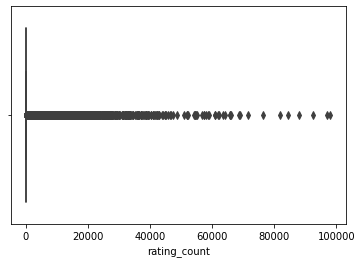

In [23]:
sns.boxplot(mov_df['rating_count'])

In [38]:
gc.collect()

0

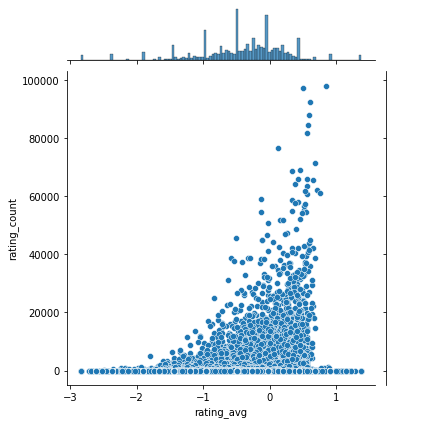

In [24]:
sns.jointplot(x='rating_avg', y='rating_count', data=mov_df)

In [32]:
# users 

usr_rat_df = pd.read_csv('./data/preprocessed/users_ratings.csv', usecols=['userId', 'count_rat', 'avg_rat'])
usr_rat_df.head(4)

,userId,count_rat,avg_rat
0,1,16,-0.204384
1,2,15,0.127745
2,3,11,0.014075
3,4,736,-0.124749


In [35]:
usr_rat_df['count_rat'].max(), usr_rat_df['count_rat'].min()

(23715, 1)

/home/lmoroco/Documentos/5to/TDS/projects/pruebas/ScalableRecommendSystem/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='count_rat'>

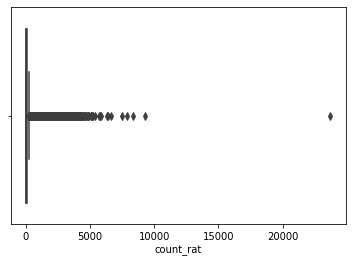

In [34]:
sns.boxplot(sns.jointplot(x='rating_avg', y='rating_count', data=mov_df)['count_rat'])

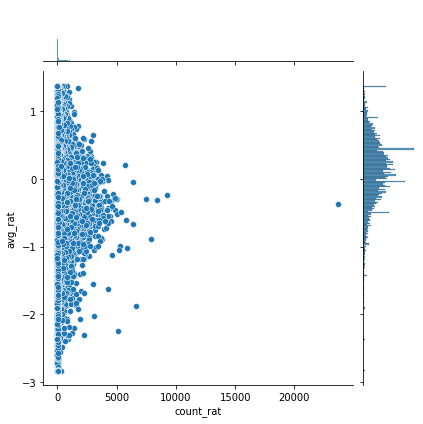

In [37]:
sns.jointplot(x='count_rat', y='avg_rat', data=usr_rat_df)

In [58]:
tags_df = pd.read_csv('./data/ml-latest/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [59]:
tags_df.drop_duplicates(inplace=True)
tags_df.dropna(inplace=True)

In [61]:
tags_df.shape

(1108981, 4)

In [62]:
x = tags_df['tag'].unique()

In [63]:
x.shape

(74714,)

In [64]:
gc.collect()

0

In [45]:
unique_tags = pd.DataFrame(tags_df['tag'].unique(), columns=['etiqueta'])


In [46]:
unique_tags.head(10)

,etiqueta
0,epic
1,Medieval
2,sci-fi
3,space action
4,imdb top 250
5,justice
6,Dinosaurs
7,psychothriller
8,philosophy
9,surveillance


In [47]:
unique_tags.shape

(74715, 1)

In [52]:
tags_df['tag'].isnull().sum()

16